<a href="https://colab.research.google.com/github/leofgonzalez/API/blob/main/Rainfall_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Linear Regression Analysis

Coefficients:  [[-4.00076510e-02  8.70526392e-03 -7.40168272e-05  3.28780535e-03
  -4.36492665e-02  3.96445271e-03  3.21449729e-03 -8.75860237e-05
   1.64527395e-03  7.07695485e-03 -4.94302117e-03  1.72081903e-03
  -8.49307420e-03  1.80219571e-02  3.08166479e-02 -1.13399528e-05
  -5.87724079e-02  5.87724079e-02]]
Intercept:  [2.97567573]
Residual sum of squares: 0.12
Variance score: 0.36
Mean absolute error: 0.27
Residual sum of squares (MSE): 0.12
R2-score: 0.36

KNN Analysis



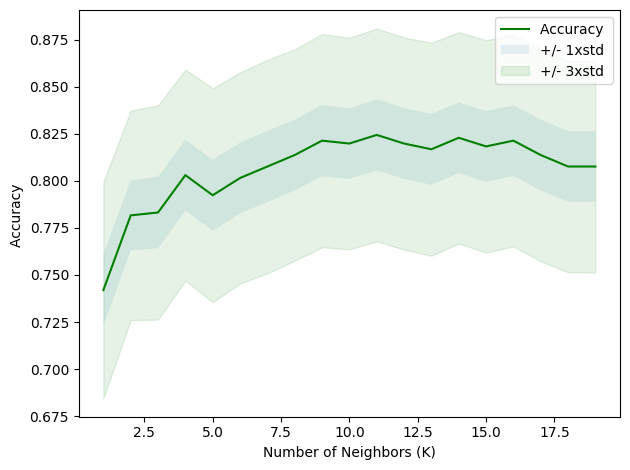


The best accuracy was with 0.8244274809160306 with K = 11
Jaccard Score 0.4166666666666667
F1_Score 0.5882352941176471

Decision Tree Alghorithm


Shape of X training set (2289, 4) &  Size of Y training set (2289, 1)
DecisionTrees's Accuracy:  0.7596741344195519
Jaccard Score 0.7318181818181818
F1_Score 0.8451443569553805




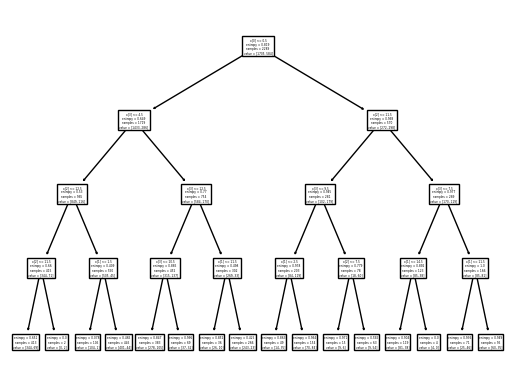


Logistic Regression Alghorithm

Train set: (2616, 18) (2616, 1)
Test set: (655, 18) (655, 1)

Accuracy Score:  0.8290076335877863
Jaccard Score:  0.7933579335793358
F1_Score:  0.6686390532544378
Log Loss:  6.16318958714675

Support Vector Machines Alghorithm

Train set: (2616, 18) (2616, 1)
Test set: (655, 18) (655, 1)

Accuracy Score:  0.7190839694656489
F1 Score:  0.6015782408851165
Jaccard Score:  0.5170817551424742


In [9]:
from sklearn import linear_model
#Avoiding warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Install // Browser based

#!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
#!pip install pyodide-py
#!pip install -c conda-forge pydotplus -y
#!pip install -c conda-forge python-graphviz -y

#Required libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import tree
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

#Reading the data

#from pyodide.http import pyfetch

df = pd.read_csv("/content/Weather_Data.csv")
df.head()

#Data preprocessing

df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

#Train and test data

df_sydney_processed.drop('Date',axis=1,inplace=True)

df_sydney_processed = df_sydney_processed.astype(float)

features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

#Setting a test space with 20% of the total lenght
msk = np.random.rand(len(df_sydney_processed)) < 0.2
train = df_sydney_processed[msk]
test = df_sydney_processed[~msk]

#Linear Regression Analysis

print('\nLinear Regression Analysis\n')

regr = linear_model.LinearRegression()
rlx_train = np.asanyarray(train[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                                 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday_No','RainToday_Yes']])
rly_train = np.asanyarray(train[['RainTomorrow']])
regr.fit (rlx_train,rly_train)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

rly_hat = regr.predict(test[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                             'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday_No','RainToday_Yes']])
rlx_test = np.asanyarray(test[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                               'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday_No','RainToday_Yes']])
rly_test = np.asanyarray(test[['RainTomorrow']])

print("Residual sum of squares: %.2f" % np.mean((rly_hat - rly_test) ** 2))

print('Variance score: %.2f' % regr.score(rlx_test,rly_test))
print("Mean absolute error: %.2f" % np.mean(np.absolute(rly_hat - rly_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((rly_hat - rly_test) ** 2))
print("R2-score: %.2f" % r2_score(rly_test, rly_hat))

#KNN

print('\nKNN Analysis\n')

KX = df_sydney_processed[['MinTemp','MaxTemp','RainToday_No','RainToday_Yes','Rainfall','Evaporation','Sunshine','Humidity9am','Pressure9am','Cloud9am','Temp9am']].values

KY = df_sydney_processed[['RainTomorrow']].values

KX_train, KX_test, KY_train, KY_test = train_test_split(KX,KY,test_size =0.2,random_state = 10)

K = 4

scaler = preprocessing.StandardScaler().fit(KX_train)
KX_train_norm = scaler.transform(KX_train.astype(float))

neigh = KNeighborsClassifier(n_neighbors = K).fit(KX_train_norm,KY_train)

KX_test_norm = scaler.transform(KX_test.astype(float))

KY_hat = neigh.predict(KX_test_norm)

''' Accuracy of train/test
print ('Train set:', KX_train.shape,  KY_train.shape)
print ('Test set:', KX_test.shape,  KY_test.shape)

print("Train set Accuracy: ", metrics.accuracy_score(KY_train, neigh.predict(KX_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(KY_test, KY_hat))'''

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(KX_train_norm,KY_train)
    KY_hat=neigh.predict(KX_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(KY_test, KY_hat)

    std_acc[n-1]=np.std(KY_hat==KY_test)/np.sqrt(KY_hat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print("\nThe best accuracy was with", mean_acc.max(), "with K =", mean_acc.argmax()+1)
print("Jaccard Score", jaccard_score(KY_test, KY_hat))
print("F1_Score", f1_score(KY_test, KY_hat))

#Decision Tree

print("\nDecision Tree Alghorithm\n")

DTX = df[['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']].values

le_raintoday = preprocessing.LabelEncoder()
le_raintoday.fit(['No','Yes'])
DTX[:,0] = le_raintoday.transform(DTX[:,0])

le_windgustdir = preprocessing.LabelEncoder()
le_windgustdir.fit(['E','ENE','ESE','N','NE','NNE','NNW','NW','S','SE','SSE','SSW','SW','W','WNW','WSW'])
DTX[:,1] = le_windgustdir.transform(DTX[:,1])

le_winddir9 = preprocessing.LabelEncoder()
le_winddir9.fit(['E','ENE','ESE','N','NE','NNE','NNW','NW','S','SE','SSE','SSW','SW','W','WNW','WSW'])
DTX[:,2] = le_winddir9.transform(DTX[:,2])

le_winddir3 = preprocessing.LabelEncoder()
le_winddir3.fit(['E','ENE','ESE','N','NE','NNE','NNW','NW','S','SE','SSE','SSW','SW','W','WNW','WSW'])
DTX[:,3] = le_winddir3.transform(DTX[:,3])

DTY = df[['RainTomorrow']].values

DTX_trainset, DTX_testset, DTY_trainset, DTY_testset = train_test_split(DTX,DTY,test_size = 0.3, random_state = 4)

print('\nShape of X training set {}'.format(DTX_trainset.shape),'&',' Size of Y training set {}'.format(DTY_trainset.shape))

rainTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

rainTree.fit(DTX_trainset,DTY_trainset)

prediction_Tree = rainTree.predict(DTX_testset)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(DTY_testset, prediction_Tree))

print("Jaccard Score", jaccard_score(DTY_testset, prediction_Tree,average="binary",pos_label='No'))
print("F1_Score", f1_score(DTY_testset, prediction_Tree,average="binary",pos_label='No'))
print("\n")
tree.plot_tree(rainTree)
plt.show()

#Logistic Regression

print("\nLogistic Regression Alghorithm\n")

LRX = np.asarray(df_sydney_processed[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
                           'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday_No','RainToday_Yes']])

LRY = np.asarray(df_sydney_processed[['RainTomorrow']])

LRX = preprocessing.StandardScaler().fit(LRX).transform(LRX)

LRX_train, LRX_test, LRY_train, LRY_test = train_test_split(LRX, LRY, test_size=0.2, random_state=1)

print ('Train set:', LRX_train.shape,  LRY_train.shape)
print ('Test set:', LRX_test.shape,  LRY_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(LRX_train,LRY_train)

LRY_hat = LR.predict(LRX_test)

LRY_hat_prob = LR.predict_proba(LRX_test)

print("\nAccuracy Score: ", accuracy_score(LRY_test, LRY_hat))
print("Jaccard Score: ", jaccard_score(LRY_test, LRY_hat,pos_label=0))
print("F1_Score: ", f1_score(LRY_test, LRY_hat))
print("Log Loss: ", log_loss(LRY_test, LRY_hat))

#Support Vector Machines (SVM)

print("\nSupport Vector Machines Alghorithm\n")

SVMX = np.asarray(df_sydney_processed[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
                           'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday_No','RainToday_Yes']])

SVMY = np.asarray(df_sydney_processed[['RainTomorrow']])

SVMX_train, SVMX_test, SVMY_train, SVMY_test = train_test_split(SVMX, SVMY, test_size=0.2, random_state=10)

print ('Train set:', SVMX_train.shape,  SVMY_train.shape)
print ('Test set:', SVMX_test.shape,  SVMY_test.shape)

clf = svm.SVC(kernel='rbf')

clf.fit(SVMX_train,SVMY_train)

SVMY_hat = clf.predict(SVMX_test)

print("\nAccuracy Score: ", accuracy_score(SVMY_test, SVMY_hat))
print('F1 Score: ',f1_score(SVMY_test, SVMY_hat, average='weighted'))
print('Jaccard Score: ', jaccard_score(SVMY_test, SVMY_hat,average='weighted'))
